了解了Ajax的分析方式和抓取方式之后，知道了这是JavaScript动态渲染页面的一种情形，通过直接分析Ajax，我们仍然可以借助requests或urllib来实现数据爬取。
---
不过JavaScript动态渲染的页面不止Ajax这一种。
---
比如中国青年网（详见http://news.youth.cn/gn/），它的分页部分是由JavaScript生成的，并非原始HTML代码，这其中并不包含Ajax请求。比如ECharts的官方实例（详见http://echarts.baidu.com/demo.html#bar-negative），其图形都是经过JavaScript计算之后生成的。再有淘宝这种页面，它即使是Ajax获取的数据，但是其Ajax接口含有很多加密参数，我们难以直接找出其规律，也很难直接分析Ajax来抓取。
---
为了解决这些问题，我们可以直接使用模拟浏览器运行的方式来实现，这样就可以做到在浏览器中看到是什么样，抓取的源码就是什么样，也就是可见即可爬。这样我们就不用再去管网页内部的JavaScript用了什么算法渲染页面，不用管网页后台的Ajax接口到底有哪些参数。
---
Python提供了许多浏览器运行的库，如Selenium、Splash、PyV8、Ghost等。本章中，我们来介绍一下Selenium和Splash的用法。有了他们，就不用再为动态渲染的页面发愁了。

# 1、Selenium的使用
---
Selenium是一个自动化测试工具，利用它可以驱动浏览器执行特定的动作，如点击、下拉等操作，同时还可以获取浏览器当前呈现的页面的源代码，做到可见即可爬。对于一些JavaScript动态渲染的页面来说，此种抓取方式非常有效。

#### 1、准备工作
---
本节以Chrome为例来讲解Selenium的用法。在开始之前，先安装Chrome浏览器并配置好了ChromeDriver。还要正确安装好Python的Selenium库。

#### 2、基本使用
---
首先大体看一下Selenium有一些怎样的功能。代码如下：

https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=0&rsv_idx=1&tn=baidu&wd=Python&rsv_pq=987c4e60000362eb&rsv_t=9de9jo5pefGT7NkvD1i7VYG3NFf8LSkq68j0Ccv4vn6ePLEc9CfeFYUez0k&rqlang=cn&rsv_enter=1&rsv_sug3=6&rsv_sug2=0&inputT=87&rsv_sug4=87
[{'domain': '.baidu.com', 'httpOnly': False, 'name': 'delPer', 'path': '/', 'secure': False, 'value': '0'}, {'domain': '.baidu.com', 'expiry': 3703056872.650215, 'httpOnly': False, 'name': 'BAIDUID', 'path': '/', 'secure': False, 'value': 'D34F80D17C417DB1E4B8C8B9D9B8E9D5:FG=1'}, {'domain': '.baidu.com', 'expiry': 3703056872.650244, 'httpOnly': False, 'name': 'BIDUPSID', 'path': '/', 'secure': False, 'value': 'D34F80D17C417DB1E4B8C8B9D9B8E9D5'}, {'domain': '.baidu.com', 'expiry': 3703056872.650258, 'httpOnly': False, 'name': 'PSTM', 'path': '/', 'secure': False, 'value': '1555573224'}, {'domain': 'www.baidu.com', 'httpOnly': False, 'name': 'BD_HOME', 'path': '/', 'secure': False, 'value': '0'}, {'domain': '.baidu.com', 'expiry': 1555659627.794538, 'httpOnly':
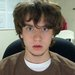

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait

browser = webdriver.Chrome()
try:
    browser.get('http://www.baidu.com')
    input = browser.find_element_by_id('kw')
    input.send_keys('Python')
    input.send_keys(Keys.ENTER)
    wait = WebDriverWait(browser, 10)
    wait.until(EC.presence_of_element_located((By.ID, 'content_left')))
    print(browser.current_url)
    print(browser.get_cookies())
    print(browser.page_source)
finally:
    browser.close()

上面代码会输出当前的URL、当前的Cookies和网页源代码

#### 3、声明浏览器对象
---
Selenium支持非常多的浏览器，如Chrome、Firefox、Edge等，还有Android、BlackBerry等手机端的浏览器。另外，也支持无界面浏览器PhantomJS
---
此外，我们可以使用如下方式初始化：

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser = webdriver.Firefox()
browser = webdriver.Edge()
browser = webdriver.PhantomJS()
browser = webdriver.Safari()

这样就完成了浏览器对象的初始化并将其赋值为browser对象。接下来，我们要做的就是调用browser对象，让其执行各个动作以模拟浏览器操作。

#### 4、访问页面
---
我们可以用get()方法来请求网页，参数传入链接URL即可。比如，这里用get()方法访问淘宝，然后打印出源代码，代码如下：

In [2]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
print(browser.page_source)
browser.close()


<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="zh-CN" class="ks-webkit537 ks-webkit ks-chrome72 ks-chrome"><head><script charset="utf-8" src="https://tce.taobao.com/api/mget.htm?callback=jsonpXctrl165&amp;tce_sid=1947683&amp;tce_vid=0&amp;tid=&amp;tab=&amp;topic=&amp;count=&amp;env=online" async=""></script><script charset="utf-8" src="https://tce.taobao.com/api/mget.htm?callback=jsonpXctrl152&amp;tce_sid=1947680&amp;tce_vid=0&amp;tid=&amp;tab=&amp;topic=&amp;count=&amp;env=online" async=""></script><script src="https://headline.taobao.com/feed/homeFeed.do?_ksTS=1555573669104_132&amp;callBack=jsonp133" async=""></script><script charset="utf-8" src="https://tce.taobao.com/api/mget.htm?callback=jsonpXctrl107&amp;tce_sid=1947787&amp;tce_vid=0&amp;tid=&amp;tab=&amp;topic=&amp;count=&amp;env=online&amp;cna=undefined" async=""></script><script src="https://ald.taobao.com/recommend2.htm?appId=20140506002%2C20140506001%2C03014&amp;_ksTS=1555573669092_94&amp;callback=jsonp95" a

运行上述代码后发现，弹出了Chrome浏览器并且自动访问了淘宝，然后控制台输出了淘宝页面的源代码，随后浏览器关闭。
通过这几行简单的代码，我们可以实现浏览器的驱动并获取网页源码，非常便捷。

#### 5、查找结点
---
Selenium可以驱动浏览器完成各种操作，比如填充表单、模拟点击等。比如，我们想要完成向某个输入框输入文字的操作，总需要知道中国输入框在哪里吧？而Selenium提供了一系列查找节点的方法，我们可以用这些方法来获取想要的节点，以便下一步执行一些动作或提取信息。
---
+ 单个节点
比如，想要从淘宝页面中提取搜索框这个节点，首先要观察它的源代码，可以发现，它的id是q，name也是q。此外，还有许多其他属性，此时我们就可以用多种方式获取它了。比如，find_element_by_name()是根据name值获取，find_element_by_id()是根据id获取。另外，还有根据XPath、CSS选择器等获取的方式。
用代码实现如下：

In [3]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element_by_id('q')
input_second = browser.find_element_by_css_selector('#q')
input_third = browser.find_element_by_xpath('//*[@id="q"]')
print(input_first, input_second, input_third)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="b2dafbab5c1cfec0d68d452eba56a69d", element="0.8487257467283305-1")> <selenium.webdriver.remote.webelement.WebElement (session="b2dafbab5c1cfec0d68d452eba56a69d", element="0.8487257467283305-1")> <selenium.webdriver.remote.webelement.WebElement (session="b2dafbab5c1cfec0d68d452eba56a69d", element="0.8487257467283305-1")>


以上代码用三种方式获取输入框，分别是根据ID、CSS选择器和XPath获取，它们返回的结果完全一致。
---
可以看到，这三个节点都是WebElement类型的，是完全一致的

In [ ]:
# 这里列出所有获取单个节点的方法
find_element_by_id
find_element_by_name
find_element_by_xpath
find_element_by_link_text
find_element_by_partial_link_text
find_element_by_tag_name
find_element_by_class_name
find_element_by_css_selector

另外，Selenium还提供了通用方法find_element()，它需要传入两个参数：查找方式By和值。实际上，它就是find_element_by_id()这种方法的通用函数版本，比如find_element_by_id(id)就等价于find_element(By.ID, id)，二者得到的结果完全一致。我们用代码实现一下：

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element(By.ID, 'q')
print(input_first)
browser.close()

# 实际上，这种查找方式的功能和上面列举的查找函数完全一致，不过参数更加灵活

+ 多个节点
---
如果查找的目标在网页中只有一个，那么完全可以用find_element()方法。但如果有多个节点，再用find_element()方法查找，就只能得到第一个节点了。如果要查找所有满足条件的节点，需要用find_elements()这样的方法。注意，在这个方法的名称中，element多了一个s，注意区分。
---
比如，要查找淘宝左侧导航栏的所有条目。实现如下：

In [5]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
lis = browser.find_elements_by_css_selector('.service-bd li')
print(lis)
browser.close()


[<selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="0.2064880410307366-1")>, <selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="0.2064880410307366-2")>, <selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="0.2064880410307366-3")>, <selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="0.2064880410307366-4")>, <selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="0.2064880410307366-5")>, <selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="0.2064880410307366-6")>, <selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="0.2064880410307366-7")>, <selenium.webdriver.remote.webelement.WebElement (session="03594a73bfd0da9c8d4f3cb12ea15940", element="

可以看到，上面代码执行后得到的内容变成了列表类型，列表中的每个节点都是WebElement类型。
---
也就是说，如果我们用find_element()方法，只能获取匹配的第一个节点，结果是WebElement类型。如果用find_elements()方法，则结果是列表类型，列表中的每个节点都是WebElement类型。

In [ ]:
# 这里列出所有获取多个节点的方法：
find_elements_by_id
find_elements_by_name
find_elements_by_xpath
find_elements_by_link_text
find_elements_by_partial_link_text
find_elements_by_tag_name
find_elements_by_class_name
find_elements_by_css_selector

当然，我们也可以直接用find_elements()方法来选择，这时可以这样写：

In [ ]:
lis = browser.find_elements(By.CSS_SELECTOR, '.service-bd li')
# 结果是完全一致的

#### 6、节点交互
---
Selenium可以驱动浏览器来执行一些操作，也就是说可以让浏览器模拟一些动作。比较常见的用法有：输入文字时用send_keys()方法，清空文字时用clear()方法，点击按钮时用click()方法，示例如下：

In [6]:
from selenium import webdriver
import time

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input = browser.find_element_by_id('q')
input.send_keys('iPhone')
time.sleep(1)
input.clear()
input.send_keys('iPad')
button = browser.find_element_by_class_name('btn-search')
button.click()



以上代码首先驱动浏览器打开淘宝，然后用find_element_by_id()方法获取输入框然后用send_keys()方法输入iPhone文字，等待一秒后用clear()方法清空输入框，再次调用send_keys()方法输入iPad文字，之后再用find_element_by_class_name()方法获取搜索按钮，最后调用click()方法完成搜索动作。
（以上代码需要登录淘宝才能运行、、、）
通过上面的方法，我们就完成了一些常见的节点的动作操作，更多的操作可以参见官方文档的交互动作介绍： http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.remote.webelement

#### 7、动作链
---
在上面的实例中，一些交互动作都是针对某个节点执行的。比如，对于输入框，我们就调用它的输入文字和清空文字的方法；对于按钮，就调用它的点击方法。其实，还有另外一些操作，它们没有特定的执行对象，比如鼠标拖拽、键盘按键等，这些动作用另一种方式来执行，那就是动作链。
---
比如，现在实现一个节点的拖拽动作，将某个节点从一处拖拽到另外一处，可以这样实现：

In [8]:
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to_frame('iframeResult')
source = browser.find_element_by_css_selector('#draggable')
target = browser.find_element_by_css_selector('#droppable')
actions = ActionChains(browser)
actions.drag_and_drop(source, target)
actions.perform()

C:\anoconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use driver.switch_to.frame instead
  import sys


首先，打开网页中的一个拖拽实例，然后依次选中要拖拽的节点和拖拽到的目标节点，接着声明ActionChains对象并将其赋值为actions变量，然后通过actions变量的drag_and_drop()方法，再调用perform()方法执行动作，此时就完成了拖拽操作。
---
更多的动作链操作可以参考官方文档： http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains

#### 8、执行JavaScript
---
对于某些操作，Selenium API并没有提供。比如，下拉进度条，它可以直接模拟运行JavaScript，此时使用execute_script()方法即可实现，代码如下：

In [2]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')
browser.execute_script('alert("To Bottom")')

# 这里就利用execute_script()方法将进度条下拉到最底部，然后弹出alert提示框
# 所以说有了这个方法，基本上API没有提供的所有功能都可以用执行JavaScript的方式来实现了。


#### 9、获取结点信息
---
前面说过，通过page_source属性可以获取网页的源代码，接着就可以使用解析库（如正则表达式、Beautiful Soup、pyquery等）来提取信息了。
---
不过，既然Selenium已经提供了选择节点的方法，返回的是web Element类型，那么它也有相关的方法和属性来直接提取节点信息，如属性、文本等。这样的话，我们就可以不用通过解析源代码来提取信息了，非常方便。
---
接下来，就看看通过怎样的方式来获取节点信息吧。

+ 获取属性
---
我们可以使用get_attribute()方法来获取节点的属性，但是其前提是先选中这个节点，示例如下：

In [4]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
logo = browser.find_element_by_id('zh-top-link-logo')
print(logo)
print(logo.get_attribute('class'))

# 运行后，程序便会驱动浏览器打开知乎页面，然后获取知乎的logo节点，最后打印出它的class。

# 输出结果如下：（通过get_attribute()方法，传入想要获取的属性名，就可以得到它的值了。）

<selenium.webdriver.remote.webelement.WebElement (session="8dc8a2081d6d205822b6552bf1d9cbd6", element="0.7024030369066474-1")>
zu-top-link-logo


+ 获取文本值
---
每个WebElement节点都有text属性，直接调用这个属性就可以得到节点内部的文本信息，这相当于Beautiful Soup的get_text()方法、pyquery的text()方法，示例如下：

In [5]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
input = browser.find_element_by_class_name('zu-top-add-question')
print(input.text)

# 这里依然先打开知乎页面，然后获取“提问”按钮这个节点，再将其文本值打印出来。

# 控制台的输出结果如下：

提问


+ 获取id、位置、标签名和大小
---
另外，WebElement节点还有一些其他属性，比如id属性可以获取节点id，location属性可以获取该节点在页面中的相对位置，tag_name属性可以获取标签名称，size属性可以获取节点的大小，也就是宽高，这些属性有时候还是很有用的。示例如下：

In [6]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
input = browser.find_element_by_class_name('zu-top-add-question')
print(input.id)
print(input.location)
print(input.tag_name)
print(input.size)

# 这里首先获得“提问”按钮这个节点，然后调用其id、location、tag_name、size属性
# 来获取对应的属性值。

0.6693156879391844-1
{'x': 759, 'y': 7}
button
{'height': 32, 'width': 66}


#### 10、切换Frame
---
我们知道网页中有一种节点叫作iframe，也就是子Frame，相当于页面的子页面，它的结构和外部网页的结构完全一致。Selenium打开页面后，它默认是在父级Frame里面操作，而此时如果页面中还有子Frame，它是不能获取到子Frame里面的节点的。这时就选哟使用switch_to.frame()方法来切换Frame。示例如下：

In [7]:
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to.frame('iframeResult')
try:
    logo = browser.find_element_by_class_name('logo')
except NoSuchElementException :
    print('NO LOGO')
browser.switch_to.parent_frame()
logo = browser.find_element_by_class_name('logo')
print(logo)
print(logo.text)

NO LOGO
<selenium.webdriver.remote.webelement.WebElement (session="ed4ac88f189ca6b1fe6a48486fe43803", element="0.9360428002224679-2")>
RUNOOB.COM


这里还是以前面演示动作链操作的网页为实例，首先通过switch_to.frame()方法切换到子Frame里面，然后尝试获取子Frame里的logo节点（这里是不能找到的），如果找不到的话，就会抛出NoSuchElementException异常，异常被捕捉之后，就会输出NO LOGO。接下来，重新启动切换回父级Frame，然后再次重新获取节点，发现此时可以成功获取了。
---
所以，当页面中包含子Frame时，如果想获取子Frame中的节点，需要先调用switch_to.frame()方法切换到对应的Frame，然后再进行操作。

#### 11、延时等待
---
在Selenium中，get()方法会在网页框架加载结束后结束执行，此时如果获取page_source，可能并不是浏览器完全加载完成的页面，如果某些页面有额外的Ajax请求，我们在网页源代码中也不一定能成功获取到。所以，这里需要延时等待一定时间，确保节点已经加载出来。
---
这里等待的方式有两种：一种是隐式等待，一种是显式等待。
---
+ 隐式等待
---
当使用隐式等待执行测试的时候，如果Selenium没有在DOM中找到节点，将继续等待，超出设定时间后，则抛出找不到节点的异常。换句话说，当查找节点而节点并没有立即出现的时候，隐式等待将等待一段时间再查找DOM，默认的时间是0。示例如下：

In [1]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.implicitly_wait(10)
browser.get('https://zhihu.com/explore')
input = browser.find_element_by_class_name('zu-top-add-question')
print(input)

# 这里我们用implicitly_wait()方法实现了隐式等待

<selenium.webdriver.remote.webelement.WebElement (session="0305a323f812b3d8d93aba366ade5d9e", element="0.27542623151759815-1")>


+ 显式等待
---
隐式等待的效果其实并没有那么好，因为我们只规定了一个固定时间，而页面的加载时间会受到网络条件的影响。
---
这里还有一种更合适的显示等待方法，它指定要查找的节点，然后指定一个最长等待时间。如果再规定时间内加载出来了这个节点，就返回查找的节点；如果到了规定时间依然没有加载出该节点，则抛出超时异常。示例如下：

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait

browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')
wait = WebDriverWait(browser, 10)
input = wait.until(EC.presence_of_element_located((By.ID, 'q')))
button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '.btn-search')))
print(input, button)

# 这里首先引入WebDriverWait这个对象，指定最长等待时间，然后调用它的until()方法，
# 传入要等待条件expected_conditions。比如，这里传入了presence_of_element_located这
# 个条件，代表节点出现的意思，其参数是节点的定位元组，也就是ID为q的节点搜索框。

# 这样可以做到的效果就是，在10秒内如果出现ID为q的节点（即搜索框）成功加载出来，就返回
# 该节点；如果超过10秒还没有加载出来，就抛出异常。

# 对于按钮，可以更改一下等待条件，比如改为element_to_be_clickable，也就是可点击，所以
# 查找按钮时查找CSS选择器为.btn-search的按钮，如果10秒内它是可点击的，也就是成功加载
# 出来了，就返回这个按钮节点；如果超过10秒还是不可以点击，也就是没有加载出来，就抛出异常。

# 运行代码，在网速较佳的情况下是可以成功加载出来的。
# 输出如下：

<selenium.webdriver.remote.webelement.WebElement (session="b30dd5ceed1de4c1e3d79040d78b2acc", element="0.19326064689425348-1")> <selenium.webdriver.remote.webelement.WebElement (session="b30dd5ceed1de4c1e3d79040d78b2acc", element="0.19326064689425348-2")>


更多关于等待条件的参数及用法，可以参考官方文档：http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.support.expected_conditions

#### 12、前进和后退
---
平常使用浏览器时都有前进和后退功能，Selenium也可以完成这个操作，它使用back()方法后退，使用forward()方法前进。示例如下：

In [2]:
import time 
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com/')
browser.get('https://www.taobao.com/')
browser.get('https://www.python.org/')
browser.back()
time.sleep(1)
browser.forward()
browser.close()

# 这里我们连续访问三个页面，然后调用back()方法回到第二个页面，接下来再调用forward()方法
# 又可以前进到第三个页面


#### 13、Cookies
---
使用Selenium，还可以方便地对Cookies进行操作，例如获取、添加、删除Cookies等。示例如下：

In [3]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
print(browser.get_cookies())
browser.add_cookie({'name':'name','domain':'www.zhihu.com','value':'germey'})
print(browser.get_cookies())
browser.delete_all_cookies()
print(browser.get_cookies())

# 首先，我们访问了知乎。加载完成后，浏览器实际上已经生成Cookies了。接着，调用
# get_cookies()方法获取所有的Cookies。然后，我们添加一个Cookie，这里传入一个字典，
# 有name、domain和value等内容。接下来，再次获取所有的Cookies。可以发现，结果就多了
# 这一项新加的Cookie。最后，调用delete_all_cookies()方法删除所有的Cookies。再重新
# 获取，发现结果就为空了。

#输出如下：

[{'domain': '.zhihu.com', 'httpOnly': False, 'name': 'l_n_c', 'path': '/', 'secure': False, 'value': '1'}, {'domain': 'www.zhihu.com', 'expiry': 1555665120.183419, 'httpOnly': False, 'name': 'tgw_l7_route', 'path': '/', 'secure': False, 'value': '66cb16bc7f45da64562a077714739c11'}, {'domain': '.zhihu.com', 'expiry': 1555666023, 'httpOnly': False, 'name': '__utmb', 'path': '/', 'secure': False, 'value': '51854390.0.10.1555664223'}, {'domain': '.zhihu.com', 'expiry': 1650272220.183474, 'httpOnly': False, 'name': 'q_c1', 'path': '/', 'secure': False, 'value': 'a0e837d5265b4d8896561c3d0e1e5bb9|1555664219000|1555664219000'}, {'domain': 'www.zhihu.com', 'httpOnly': False, 'name': '_xsrf', 'path': '/', 'secure': False, 'value': '91da78a0c48c3db3c86c3c0075971344'}, {'domain': '.zhihu.com', 'expiry': 1558256220.183522, 'httpOnly': False, 'name': 'r_cap_id', 'path': '/', 'secure': False, 'value': '"OTliZTM2NDg0NjI2NGMxNDkxMjgwYmUyYWI4Nzg0MDM=|1555664219|30750ca61373a341aabda94136e1b6b401c54c87"'

#### 14、选项卡管理
---
在访问网页的时候，会开启一个个选项卡。在Selenium中，我们也可以对选项卡进行操作。示例如下：

In [5]:
import time 
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com/')
browser.execute_script('window.open()')
print(browser.window_handles)
browser.switch_to_window(browser.window_handles[1])
browser.get('https://www.taobao.com')
time.sleep(1)
browser.switch_to_window(browser.window_handles[0])
browser.get('https://python.org')


['CDwindow-6ACC6592B314045666176DC89F474A71', 'CDwindow-60333239397FD8B76FD0DD182E0C6BF3']


C:\anoconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: use driver.switch_to.window instead
  
C:\anoconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: use driver.switch_to.window instead
  # This is added back by InteractiveShellApp.init_path()


以上代码首先访问了百度，然后调用execute_script()方法，这里传入window.open()这个JavaScript语句新开启一个选项卡。接下来，我们想要切换到该选项卡。这里调用window_handles属性获取当前开启的所有选项卡，返回的是选项卡的代号列表。要想切换选项卡，只需要调用switch_to_window()方法即可，其中参数是选项卡的代号。这里我们将第二个选项卡代号传入，即跳转到第二个选项卡，接下来在第二个选项卡下打开一个新页面，然后切换回第一个选项卡重新调用switch_to_window()方法，再执行其他操作即可。
---

#### 15、异常处理
---
在使用Selenium的过程中，难免会遇到一些异常，例如超时、节点未找到等错误，一旦出现此类错误，程序便不会继续运行了。这里我们可以使用try except语句来捕获各种异常。
---
首先，演示一下节点未找到的异常，示例如下：

In [6]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.find_element_by_id('hello')

# 这里首先打开百度页面，然后尝试选择一个并不存在的节点，此时就会遇到异常。

# 运行之后输出如下：

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"id","selector":"hello"}
  (Session info: chrome=72.0.3626.121)
  (Driver info: chromedriver=72.0.3626.69 (3c16f8a135abc0d4da2dff33804db79b849a7c38),platform=Windows NT 10.0.17134 x86_64)


可以看到，这里抛出了NoSuchElementException异常，这通常是节点未找到的异常。为了防止程序遇到异常而中断，我们需要捕获这些异常，示例如下：

In [7]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException

browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
except TimeoutException:
    print('Time Out')
try:
    browser.find_element_by_id('hello')
except NoSuchElementException:
    print('No Element')
finally:
    browser.close()

# 这里我们使用try except来捕获各类异常。比如，我们对find_element_by_id()查找节点
# 的方法捕获NoSuchElementException异常，这样一旦出现这样的错误，就进行异常处理，
# 程序也不会中断了。

No Element



关于更多的异常类，可以参考官方文档： http://selenium-python.readthedocs.io/api.html#module-selenium.common.exceptions